## Load Important Libiraries

In [70]:
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [71]:
#!pip install pandas_profiling

In [72]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
#from helpe_my_test import *
import pandas_profiling


## Load Data

In [73]:
# reading the csv file
missing_values = ["n/a", "na", "undefined", '']
df = pd.read_csv("../data/AdSmartABdata.csv", na_values=missing_values)
pd.set_option('display.max_columns', None)
df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [74]:
#
df['date'] = pd.to_datetime(df['date'])

# General statistics


In [75]:
# number of elements in the df
df.size

72693

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


In [77]:
#converting date and time to date_time
df['date']=pd.to_datetime(df['date'])
df['hour']=pd.to_datetime(df['hour'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   datetime64[ns]
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 568.0+ KB


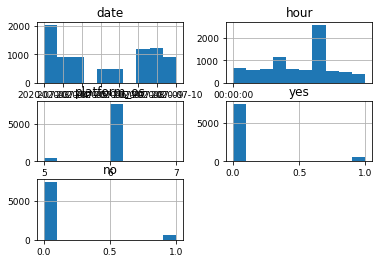

In [79]:
# histograms of the variables
fig = df.hist(xlabelsize=9, ylabelsize=9)
plt.show()

In [80]:
# descriptive statistics that summarize the central tendency, dispersion of the df's categorical columns, excluding NaN values
df.describe(include=[np.object]).T

,count,unique,top,freq
auction_id,8077,8077,0008ef63-77a7-448b-bd1e-075f42c55e39,1
experiment,8077,2,control,4071
device_make,8077,270,Generic Smartphone,4743
browser,8077,15,Chrome Mobile,4554


We have two unique values for experiment
-18 unique values for the browsers with Chrome mobile topping.
-270device makes and 8077 auction id,meaning each customer just had a single entry
-We have 8 unique dates

In [81]:
df["experiment"] = df["experiment"].astype("category")
df["device_make"] = df["device_make"].astype("category")
df["browser"] = df["browser"].astype("category")
df["auction_id"] = df["auction_id"].astype("category")

In [82]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
platform_os,8077.0,5.947134,0.224333,5.0,6.0,6.0,6.0,7.0
yes,8077.0,0.070818,0.256537,0.0,0.0,0.0,0.0,1.0
no,8077.0,0.083075,0.276013,0.0,0.0,0.0,0.0,1.0


# Univariate Analysis

### Auction ID

In [83]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

This indicates that each auction id is unique.

## Expierment

In [84]:
# unique value counts
counts_df = df['experiment'].value_counts()
counts_df

control    4071
exposed    4006
Name: experiment, dtype: int64

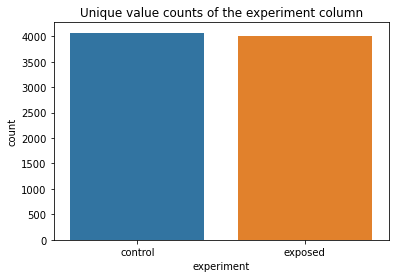

In [85]:
sns.countplot(data=df, x='experiment')
plt.title('Unique value counts of the experiment column');

#### This show us that the grouping of control and exposed is balanced in terms of numbers.

## Date

In [86]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

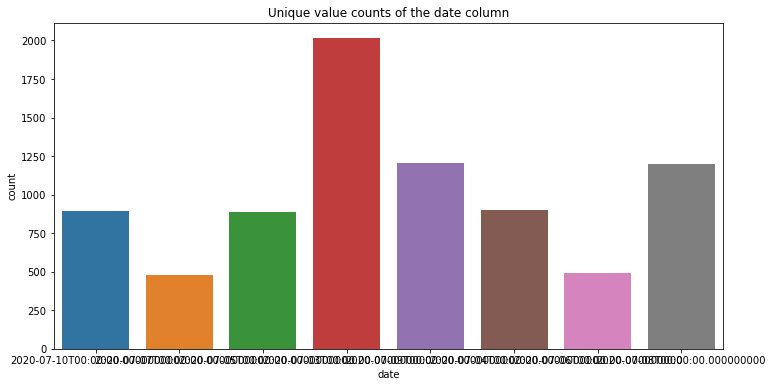

In [87]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the date column');
sns.countplot(data=df, x='date')
plt.show()

#### From the plot we can infer that the first day 2020/07/03 has recieved the highest number of visitors from the rest of the days.

## Hour

In [88]:
# unique value counts
counts_df = df['hour'].value_counts()
counts_df

1970-01-01 00:00:00.000000015    1895
1970-01-01 00:00:00.000000008     394
1970-01-01 00:00:00.000000007     381
1970-01-01 00:00:00.000000009     346
1970-01-01 00:00:00.000000010     336
1970-01-01 00:00:00.000000016     335
1970-01-01 00:00:00.000000006     327
1970-01-01 00:00:00.000000014     319
1970-01-01 00:00:00.000000005     302
1970-01-01 00:00:00.000000013     290
1970-01-01 00:00:00.000000011     282
1970-01-01 00:00:00.000000004     281
1970-01-01 00:00:00.000000012     278
1970-01-01 00:00:00.000000018     273
1970-01-01 00:00:00.000000003     266
1970-01-01 00:00:00.000000020     264
1970-01-01 00:00:00.000000017     263
1970-01-01 00:00:00.000000002     230
1970-01-01 00:00:00.000000019     227
1970-01-01 00:00:00.000000001     222
1970-01-01 00:00:00.000000021     206
1970-01-01 00:00:00.000000000     194
1970-01-01 00:00:00.000000022     135
1970-01-01 00:00:00.000000023      31
Name: hour, dtype: int64

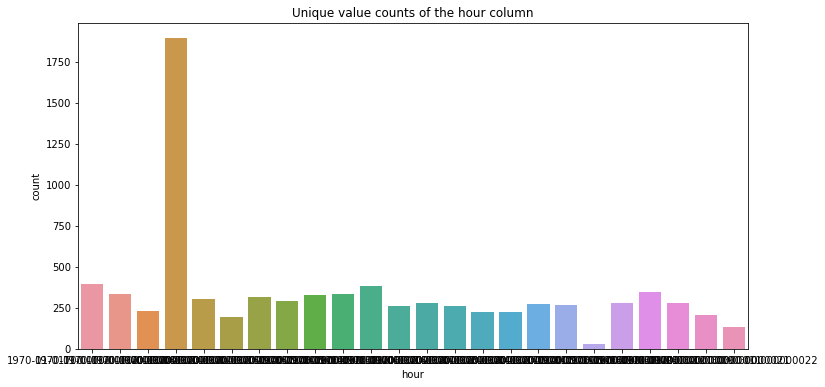

In [89]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='hour')
plt.show()

#### Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

## Device

In [90]:
# unique value counts
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
Samsung SM-A700F         1
Samsung SM-A750GN        1
Samsung SM-A908B         1
Samsung SM-C9000         1
moto e5 plus             1
Name: device_make, Length: 270, dtype: int64

In [91]:
df['device_make'].nunique()

270

## Platform Os

In [92]:
# unique value counts
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

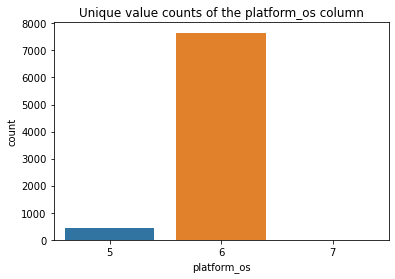

In [93]:
sns.countplot(data=df, x='platform_os')
plt.title('Unique value counts of the platform_os column');

## Browser

In [94]:
# unique value counts
counts_df = df['browser'].value_counts()
counts_df

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Opera Mobile                     3
Pinterest                        3
Android                          1
Edge Mobile                      1
Firefox Mobile                   1
Opera Mini                       1
Puffin                           1
Name: browser, dtype: int64

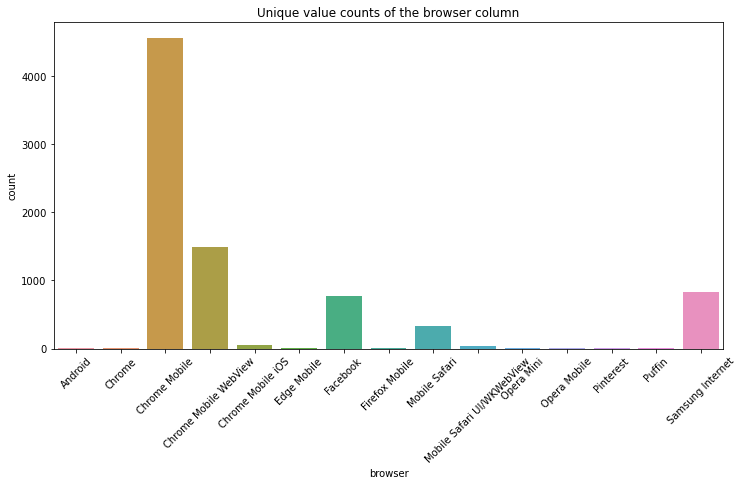

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

#### Chrome browsers are the most used browsers among the users.

## YES

In [96]:
# unique value counts
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

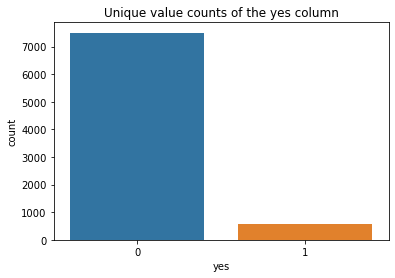

In [97]:
sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

## NO

In [98]:
# unique value counts
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

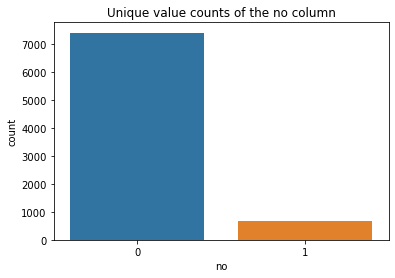

In [99]:
sns.countplot(data=df, x="no")
plt.title('Unique value counts of the no column')
plt.show()

# Bivariate Analysis

## Experiment and date

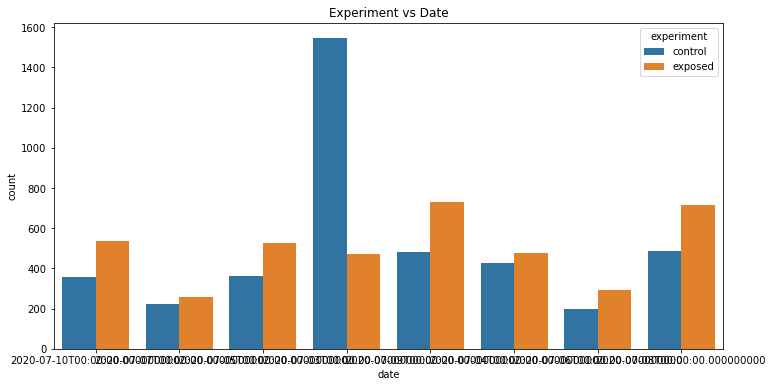

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="date", hue="experiment")
plt.title('Experiment vs Date')
plt.show()

#### In the first day around 3/4 of the visitors were from the control group. The rest of the days saw the dominance of the exposed group.

## Experiment and hour

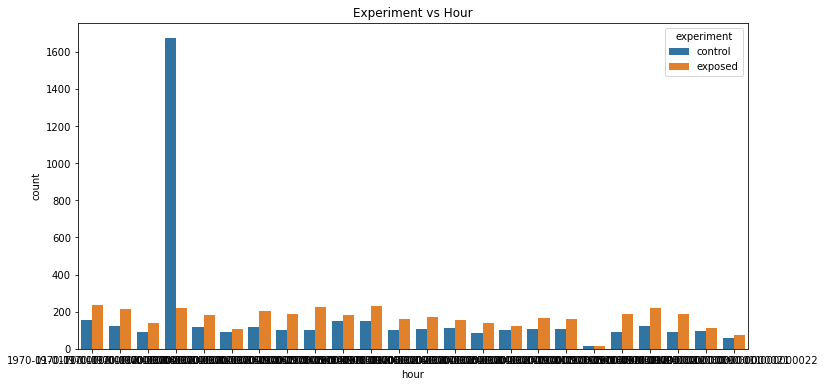

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="hour", hue="experiment")
plt.title('Experiment vs Hour')
plt.show()

#### Users from the control group were the most active at hour 15.

## Experiment and Browser

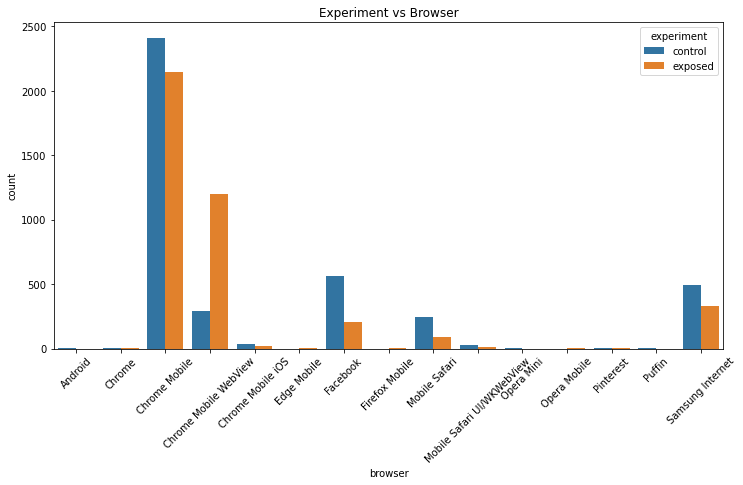

In [102]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser", hue="experiment")
plt.title('Experiment vs Browser')
plt.xticks(rotation=45)
plt.show()

## Experiment and OS

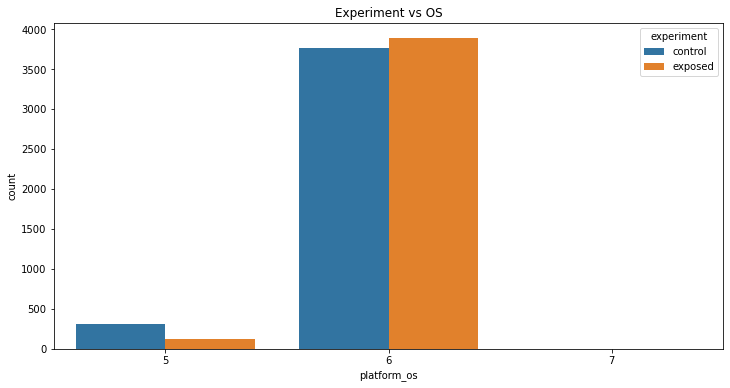

In [103]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="platform_os", hue="experiment")
plt.title('Experiment vs OS')
plt.show()

## Experiment and Yes

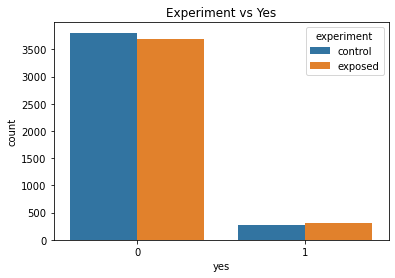

In [104]:
sns.countplot(data=df, x="yes", hue="experiment")
plt.title('Experiment vs Yes')
plt.show()

## Experiment and No

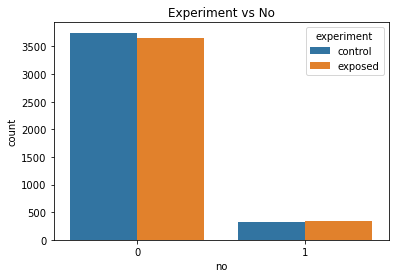

In [105]:
sns.countplot(data=df, x="no", hue="experiment")
plt.title('Experiment vs No')
plt.show()

# Corelation Analysis

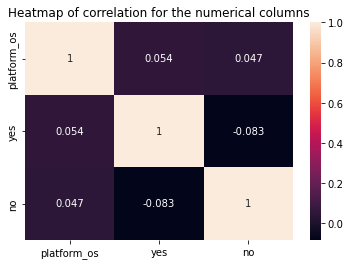

In [106]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

#### There is no significant correlation between the numerical columns.